<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining/blob/main/Pandas_Jul23_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Numpy   Pandas/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
pv_table = pd.pivot_table(df,index = ["Sex","Pclass"], aggfunc={'Survived':np.mean, "Age":np.median})
pv_table

Age  Survived
Sex Pclass                
0   1       35.0  0.968085
    2       28.0  0.921053
    3       21.5  0.500000
1   1       40.0  0.368852
    2       30.0  0.157407
    3       25.0  0.135447

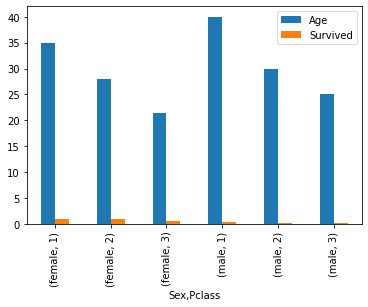

In [14]:
pv_table.plot(kind='bar')

In [18]:
plt.
plt.style.use('ggplot')
plt.show()

In [24]:
# one hot encoding
# using pandas get_dummies function to separate the sex into its own columns 
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [27]:
#using pandas get_dummies function to separate the sex into its own columns 
# and prefix the column headers
pd.get_dummies(df['Sex'], prefix="Sex")

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
# Identifying columns that have object as dtype
object_columns = [i for i in df.columns if df[i].dtype == 'object']
object_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [30]:
#Using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['Sex'] = lb_make.fit_transform(df['Sex'])
df[{'Name', 'Sex', 'Age'}]

,Sex,Name,Age
0,1,"Braund, Mr. Owen Harris",22.0
1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,0,"Heikkinen, Miss. Laina",26.0
3,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,1,"Allen, Mr. William Henry",35.0
...,...,...,...
886,1,"Montvila, Rev. Juozas",27.0
887,0,"Graham, Miss. Margaret Edith",19.0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,1,"Behr, Mr. Karl Howell",26.0


In [48]:
df = pd.DataFrame([[5,13],[1,3],[2,9]], columns = ['A','B'])
df

,A,B
0,5,13
1,1,3
2,2,9


In [51]:
# <apply()> function computes the output a function (like min, max, mean, median, etc) on an entire series
df.apply(np.mean,axis=1)

0    9.0
1    2.0
2    5.5
dtype: float64

# Statistics

---
# *Categoric*
*   Nominal - Without an order Eg: Pin-codes, sex (male/female), 
*   Ordinal - Following a specific order Eg: Cabin classes (first, second, third), 

# *Numeric*
* Quantitative
* Qualitative

Representaton of data
---
* Descriptive - collection and representation of entire data: Eg: Census
* Inferential - Drawing a conclusion out of 'Sample' data Eg: Outcome of opinion polls

---

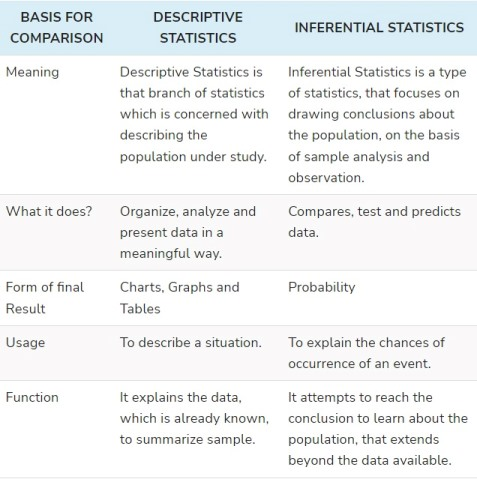

# *Notes from: 24 Jul 2022*

---
# Characterics of Frequency Distribution

1. Modality - Frequently occuring number
* Unimodial - One value occuring frequently
* Bimodal - Two values occuring frequently

2. Symmetry
* Symmetric - Normal distribution (even distribution of values on either side of mean / average)
* Asymmetric - Positive skewness (where distribution is skewed towards positive / higher values), Negative skewness (where distribution is skewed towards negative / lower values)

3. Central Tendency
* Mean - Average
* Median - Middle value in sorted order
* Mode - Most frequent value

4. Variability
* Range - (Max) minus (Min)
* Standard Deviation - Deviation from the mean. 
 - Low standard deviation means the values are closer to the mean
 - High standard deviation means the values are spread wider away from the mean

*Exercises*
 * "Crossing the stream" - Average depth
 * "Hot-shot" salesman - missed sales
 * Choosing a player based on match performance
 - Eg 1: Player B is statistically preferred based on the low deviation which means better consistency in match performance
 - Eg 2: Player A is statistically preferred based on the low deviation which means better consistency in match performance

# Percentile and Quartile
Given a number N, calculate the N% of values in a sorted data set

Each 25% percentile is a Quartile

# Box Plot
IQR (Interquartile range) - values between 1st Quartile and 3rd Quartile. Can add an additional 1.5 percentile to either ends to define minimum and maximum ranges. 
Outlier - values outside the above min (Q1-1.5%) and max (Q3 + 1.5%) range

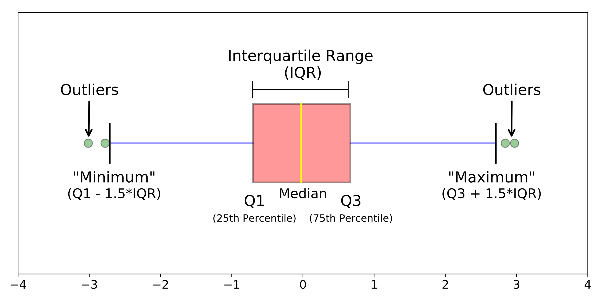